In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [131]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [132]:
train_original=train.copy()
test_original=test.copy()
# train_original=train[:]
# test_original=test[:]

In [133]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [134]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [135]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [136]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [137]:
train.dtypes,test.dtypes

(ID                   int64
 Datetime    datetime64[ns]
 Count                int64
 dtype: object, ID                   int64
 Datetime    datetime64[ns]
 dtype: object)

In [138]:
for i in (train,test,train_original,test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [139]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [128]:
temp2=train['Datetime'].apply(lambda row:1 if row.dayofweek in range(5,7) else 0)
train['weekend']=temp2

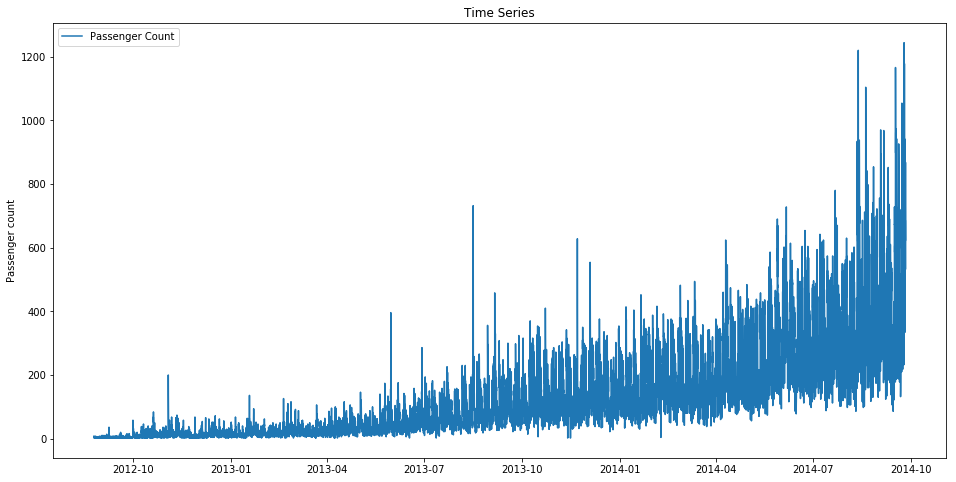

In [148]:
#indexing the datetime to get the time perios on the x-axis
train.index=train['Datetime']
#drop ID variable to get only the Datetime on x-axis
df=train.drop('ID',1)
ts=df['Count']
#after mark Datetime as index,ts contain is by defauly,so need to picking
#it explicitly,we should got it when getting Count column,because index 
#column always should be the with data,eith 1 column or more
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel=('Time(year-month)')
plt.ylabel('Passenger count')
plt.legend(loc='best')

In [146]:
#simply do this
# plt.figure(figsize=(16,8))
# plt.plot(train['Datetime'],train['Count'])